In [264]:
#!pip install spacy
#!pip install nltk
#!pip install wordcloud
#nltk.download('stopwords')
#!pip install TextBlob

     |████████████████████████████████| 636 kB 367 kB/s eta 0:00:01


In [315]:
# https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe

# Environment
import os

# Random
import random
random.seed(2)

# Data Manipulation Tools
import pandas as pd
import numpy as np
from fuzzymatcher import link_table, fuzzy_left_join
import difflib 
import geopandas as gpd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100


# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Data Visualization Tools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from colour import Color
%matplotlib inline
plt.style.use('bmh')

# libraries for displaying images
from IPython.display import HTML, Image 
from IPython.core.display import HTML 
from IPython.display import display
import selenium

# NLP Module
import nltk # Natural language processing toolkit
from nltk import FreqDist # Frequency distribution
import re # for regular expressions
import spacy # library for advanced Natural Language Processing 
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS 
from textblob import TextBlob


# Location Modules
import folium
from geopy.geocoders import Nominatim

# Web Scraping Modules
import requests 
from bs4 import BeautifulSoup as bs
from io import StringIO

# Securing Credentials
import getpass

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [320]:
#df = pd.read_csv('Hotel_Reviews.csv')

df = pd.read_csv('Hotel_Reviews.csv')
print(df.shape)
df.head(2)

(515738, 17)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [198]:
df.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

<AxesSubplot:>

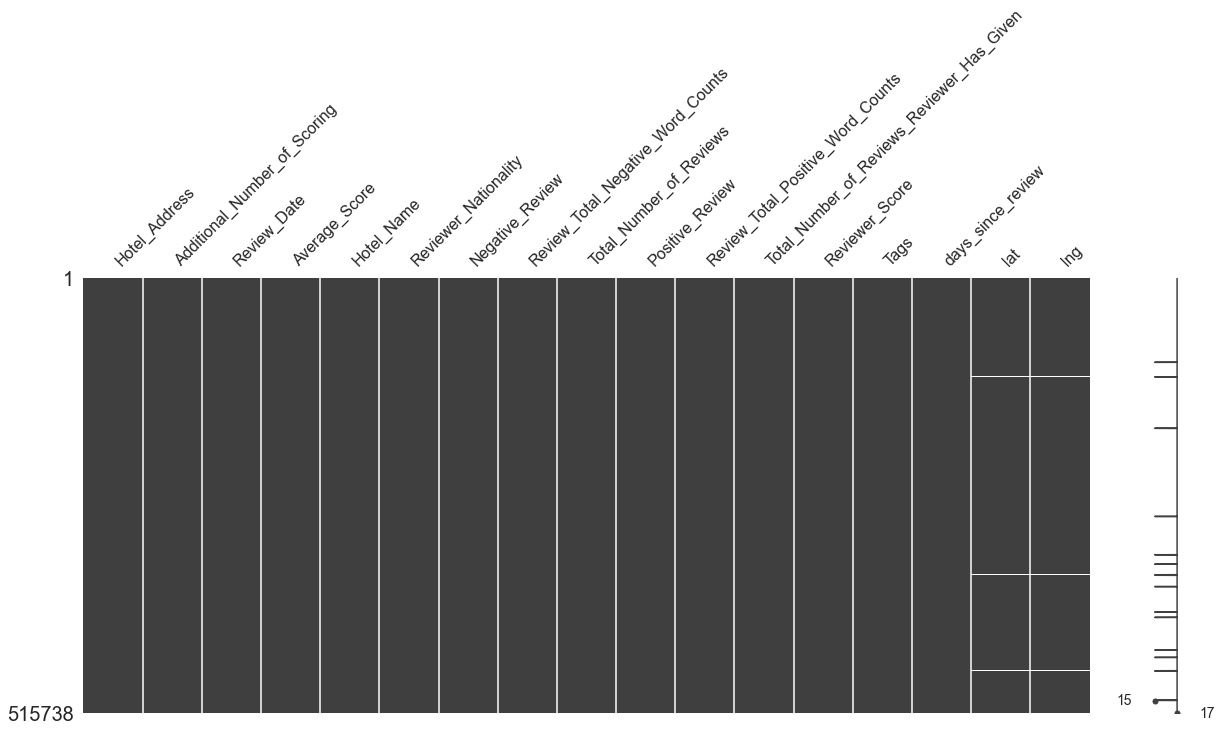

In [199]:
import missingno as msno
msno.matrix(df, figsize = (20,8))

In [200]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [201]:
# drop null coordinates
df.dropna(inplace = True)

In [202]:
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [203]:
#let's group based on hotel name
df.set_index(['Hotel_Name', 'Review_Date'])#.count().sort_values(by = 'Review_Date',ascending = False)

Hotel_Address  \
Hotel_Name            Review_Date                                                      
Hotel Arena           8/3/2017      s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
                      8/3/2017      s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
                      7/31/2017     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
                      7/31/2017     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
                      7/24/2017     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                                              ...   
Atlantis Hotel Vienna 8/30/2015    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
                      8/22/2015    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
                      8/19/2015    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
                      8/17/2015    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
                      8/9/2015     Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

                                   Additional_Number_of_Scoring  \
Hotel_Name            Review_Date                                 
Hotel Arena           8/3/2017                              194   
                      8/3/2017                              194   
                      7/31/2017                             194   
                      7/31/2017                             194   
                      7/24/2017                             194   
...                                                         ...   
Atlantis Hotel Vienna 8/30/2015                             168   
                      8/22/2015                             168   
                      8/19/2015                             168   
                      8/17/2015                             168   
                      8/9/2015                              168   

                                   Average_Score Reviewer_Nationality  \
Hotel_Name            Review_Date                                       
Hotel Arena           8/3/2017               7.7              Russia    
                      8/3/2017               7.7             Ireland    
                      7/31/2017              7.7           Australia    
                      7/31/2017              7.7      United Kingdom    
                      7/24/2017              7.7         New Zealand    
...                                          ...                  ...   
Atlantis Hotel Vienna 8/30/2015              8.1              Kuwait    
                      8/22/2015              8.1             Estonia    
                      8/19/2015              8.1               Egypt    
                      8/17/2015              8.1              Mexico    
                      8/9/2015               8.1             Hungary    

                                                                     Negative_Review  \
Hotel_Name            Review_Date                                                      
Hotel Arena           8/3/2017      I am so angry that i made this post available...   
                      8/3/2017                                           No Negative   
                      7/31/2017     Rooms are nice but for elderly a bit difficul...   
                      7/31/2017     My room was dirty and I was afraid to walk ba...   
                      7/24/2017     You When I booked with your company on line y...   
...                                                                              ...   
Atlantis Hotel Vienna 8/30/2015     no trolly or staff to help you take the lugga...   
                      8/22/2015             The hotel looks like 3 but surely not 4    
                      8/19/2015     The ac was useless It was a hot week in vienn...   
                      8/17/2015                                          No Negative   
                      8/9/2015          I was in

In [204]:
# replace No Negative and No Positive with empty string

df['Negative_Review'] = df['Negative_Review'].replace({'No Negative': ''})
df['Positive_Review'] = df['Positive_Review'].replace({'No Positive': ''})

In [205]:
len(df.Hotel_Name.unique()) #total number of distinct hotels

1475

Text(0, 0.5, 'Score Counts')

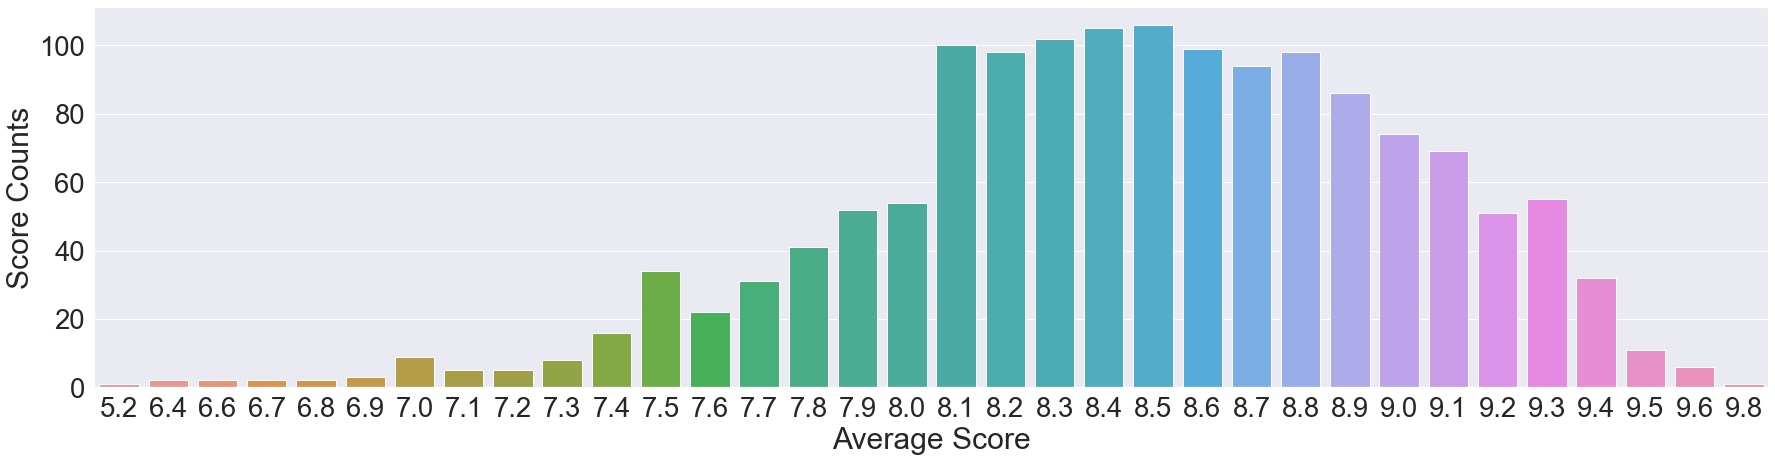

In [206]:
# Plot average score

data_plot = df[["Hotel_Name","Average_Score"]].drop_duplicates()
fig, ax = plt.subplots(figsize= (30,7))
sns.countplot(ax = ax,x = "Average_Score",data=data_plot)
ax.set_xlabel('Average Score')
ax.set_ylabel('Score Counts')

In [207]:
# Set up the matplot figure
#f,ax = plt.subplots(figsize=(20,20))

#Draw the heatmap using seaborn
#sns.heatmap(df.corr(), cmap='inferno', annot=True)

In [236]:
df_reviews = df[['Hotel_Name', 'Average_Score', 'Negative_Review', 'Positive_Review', 'Reviewer_Score']]
df_reviews.head()

,Hotel_Name,Average_Score,Negative_Review,Positive_Review,Reviewer_Score
0,Hotel Arena,7.7,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
1,Hotel Arena,7.7,,No real complaints the hotel was great great ...,7.5
2,Hotel Arena,7.7,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1
3,Hotel Arena,7.7,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,Hotel Arena,7.7,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7


In [269]:
# A function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# A function to count the most frequent words
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation = 90)
    plt.show()

# A function to draw word cloud
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [239]:
# Remove unwanted characters, numbers and symbols
df_reviews['Positive_Review'] = df_reviews['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df_reviews['Negative_Review'] = df_reviews['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

In [243]:
# Define stopwords
stop_words = stopwords.words('english')

# make entire text lowercase
df_reviews['Positive_Review'] = [r.lower() for r in df_reviews['Positive_Review']] 
df_reviews['Negative_Review'] = [r.lower() for r in df_reviews['Negative_Review']]

# I would apply everyting below to both positive and negative reviews
# remove short words (length < 4)
df_reviews['Positive_Review'] = df_reviews['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_reviews['Negative_Review'] = df_reviews['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


# remove stopwords from the text
df_reviews['Positive_Review'] = [remove_stopwords(r.split()) for r in df_reviews['Positive_Review']]
df_reviews['Negative_Review'] = [remove_stopwords(r.split()) for r in df_reviews['Negative_Review']]

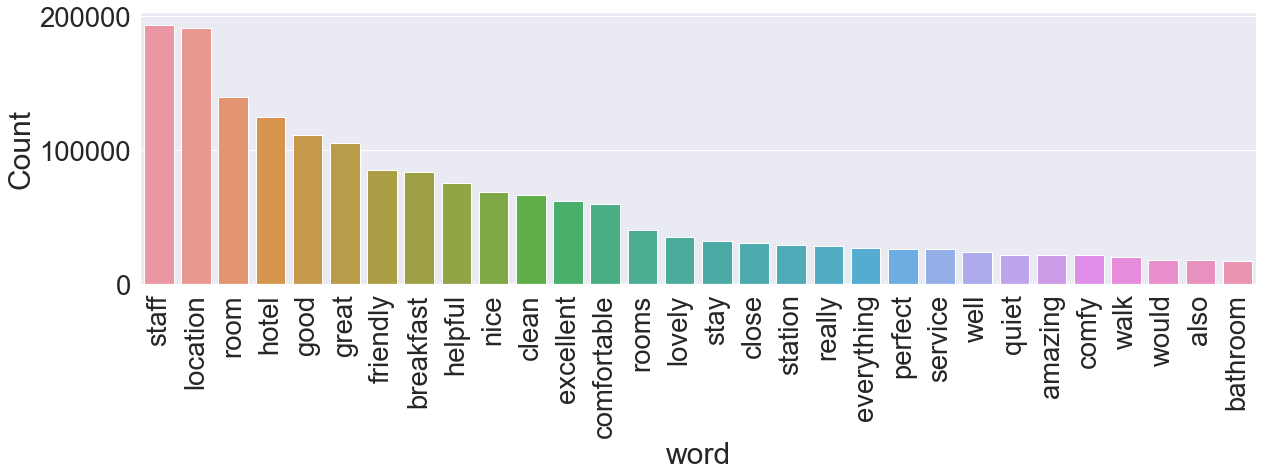

In [244]:

freq_words(df['Positive_Review']) # Frequency distribution of common words in positive reviews

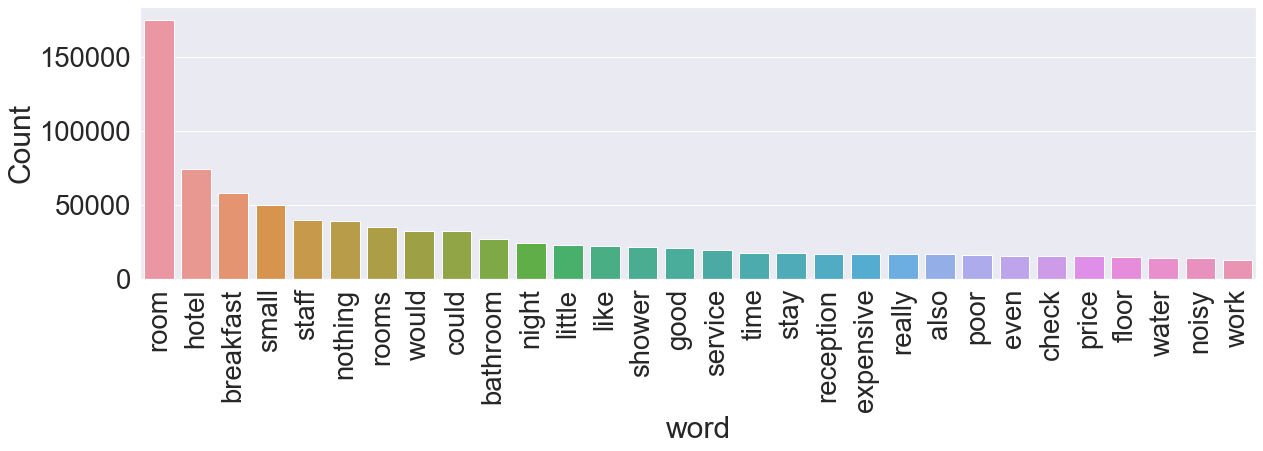

In [246]:
freq_words(df_reviews['Negative_Review'], 30) # Checking frequency of most used words in negative reviews

Positive reviews


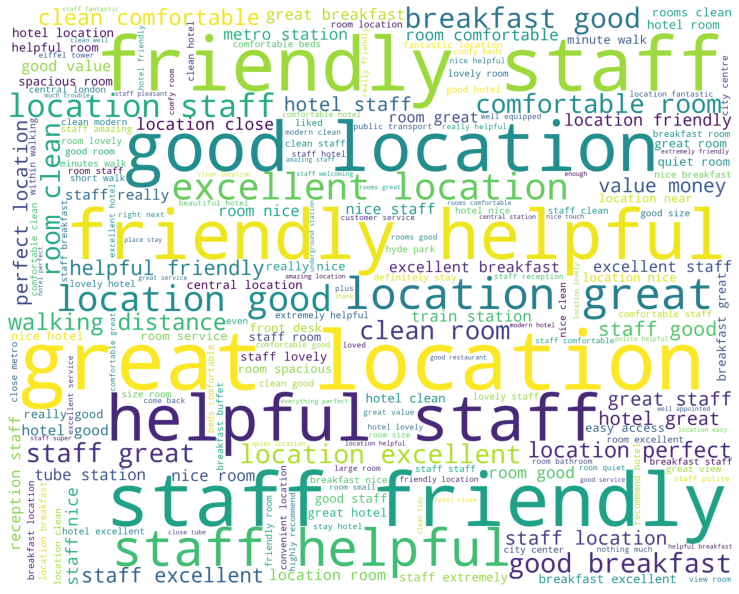

Negative reviews


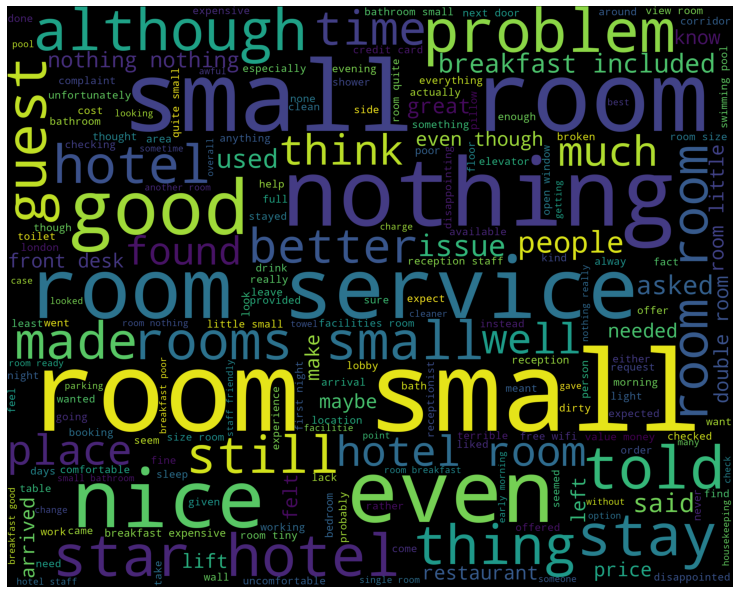

In [251]:
# Using wordcloud to visually represent the text data

print("Positive reviews")
wordcloud_draw(df_reviews['Positive_Review'],'white')
print("Negative reviews")
wordcloud_draw(df_reviews['Negative_Review'])

In [262]:
# Let's combine reviews into one to get polarity and subjectivity
df_reviews['Review'] = df_reviews.Negative_Review + df_reviews.Positive_Review
df_reviews.head(2)

,Hotel_Name,Average_Score,Negative_Review,Positive_Review,Reviewer_Score,Review
0,Hotel Arena,7.7,angry made post available possible sites plani...,park outside hotel beautiful,2.9,angry made post available possible sites plani...
1,Hotel Arena,7.7,,real complaints hotel great great location sur...,7.5,real complaints hotel great great location sur...


In [270]:
# Let's get polarity and subjectivity

df_reviews['Polarity'] = df_reviews['Review'].apply(getPolarity)
df_reviews['Subjectivity'] = df_reviews['Review'].apply(getSubjectivity)

In [289]:
df_reviews.head(2)

,Hotel_Name,Average_Score,Negative_Review,Positive_Review,Reviewer_Score,Review,Polarity,Subjectivity
0,Hotel Arena,7.7,angry made post available possible sites plani...,park outside hotel beautiful,2.9,angry made post available possible sites plani...,0.054234,0.446622
1,Hotel Arena,7.7,,real complaints hotel great great location sur...,7.5,real complaints hotel great great location sur...,0.280357,0.480952


In [288]:
# let's average all the values that we got
grouped_df = df_reviews.groupby('Hotel_Name').mean()

# get coordinates from prior dataframe
grouped_df = pd.merge(grouped_df, df[['Hotel_Name', 'lat', 'lng']], 'left', 'Hotel_Name').drop_duplicates()

# turns into geopandas
grouped_df = gpd.GeoDataFrame(
    grouped_df, geometry=gpd.points_from_xy(grouped_df.lat, grouped_df.lng))

grouped_df.sort_values('Polarity', ascending = False)

,Hotel_Name,Average_Score,Reviewer_Score,Polarity,Subjectivity,lat,lng,geometry
250419,Hotel The Serras,9.6,9.623474,0.462467,0.650800,41.380181,2.180688,POINT (41.38018 2.18069)
155886,H tel D Aubusson,9.4,9.552041,0.442237,0.653057,48.854733,2.339528,POINT (48.85473 2.33953)
231428,Hotel Landhaus Fuhrgassl Huber,9.0,9.138028,0.438994,0.610775,48.250869,16.304957,POINT (48.25087 16.30496)
247058,Hotel Sans Souci Wien,9.4,9.506383,0.436071,0.630165,48.204576,16.356366,POINT (48.20458 16.35637)
216328,Hotel Casa Camper,9.6,9.718937,0.432517,0.625861,41.383241,2.168530,POINT (41.38324 2.16853)
...,...,...,...,...,...,...,...,...
123055,Eurohotel Diagonal Port,7.0,6.809615,0.077331,0.499957,41.400671,2.208784,POINT (41.40067 2.20878)
497685,Villa Lut ce Port Royal,7.0,6.385106,0.043485,0.420702,48.836420,2.360333,POINT (48.83642 2.36033)
497623,Villa Eugenie,6.8,5.864516,0.031070,0.491182,48.887128,2.314205,POINT (48.88713 2.31420)
232519,Hotel Liberty,5.2,5.121538,0.028729,0.471698,45.450867,9.194866,POINT (45.45087 9.19487)


In [304]:
# Create a map
m = folium.Map(width=1000,height=1000,location=[54.5260, 15.2551], zoom_start=4)

for lat, lng, label, size in zip(grouped_df.lat, grouped_df.lng, grouped_df.Hotel_Name, grouped_df.Subjectivity*10):
    folium.CircleMarker(
        [lat, lng],
        radius=size,
        #color=color_dict[key],
        popup=label,
        fill = True,
        fill_color='white',
        fill_opacity=0.6
    ).add_to(m)
m